<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA6S8_SingleScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Jul  2 09:40:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Mounted at /content/drive


#### Downloading and installing dependencies from the GitHub link:


In [ ]:
!rm -rf /content/mini-Rekog && mkdir /content/model_saves

In [ ]:
!git clone https://github.com/rajy4683/mini-Rekog.git 

Cloning into 'mini-Rekog'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 90 (delta 38), reused 76 (delta 27), pack-reused 0
Unpacking objects: 100% (90/90), done.


In [ ]:
!pip install -r /content/mini-Rekog/requirements.txt

#### WANDB client login

In [ ]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
sys.path.append('/content/mini-Rekog/')


In [ ]:
from miniRekog.utils import fileutils
from miniRekog.config.config import config

In [ ]:
!pip install -U albumentations

In [ ]:
!python /content/mini-Rekog/miniRekog/training_scripts/train_s8eva6.py -p '{"lr":0.2, "momentum":0.9, "epochs":40, "weight_decay":0.00015753761358641488}'

Setting  lr  =  0.2
Setting  momentum  =  0.9
Setting  epochs  =  40
Setting  weight_decay  =  0.00015753761358641488
Final Hyperparameters
{'dropout': 0.1, 'batch_size': 512, 'test_batch_size': 128, 'lr': 0.1, 'momentum': 0.9, 'no_cuda': False, 'seed': 1, 'epochs': 24, 'bias': False, 'sched_lr_gamma': 0.5, 'sched_lr_step': 1, 'start_lr': 0, 'weight_decay': 0.0, 'reg_l1': False, 'reg_l2': False, 'norm_strategy': 'BatchNorm', 'lr_decay_threshold': 0.0, 'factor': 0.0, 'project': 'news5', 'ocp_max_lr': 0.5, 'final_div_factor': 64, 'div_factor': 128, 'anneal_strategy': 'linear', 'pct_start': 0.208, 'cycle_momentum': False, 'lr_policy': 'ocp', 'split_pct': 0.208, 'unfreeze_layer': 3}
Initializing datasets and dataloaders
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:645: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:122: FutureWarning: IAA

In [ ]:
!cp /content/model_saves/model-32ec0ba3a6.pt /content/drive/MyDrive/EVA6/model_saves

In [ ]:
!cp  /content/drive/MyDrive/EVA6/model_saves/model-32ec0ba3a6.pt /content/model_saves/ 

### Loss and Accuracy Plots


In [ ]:
from miniRekog.utils import logger
from miniRekog.utils import fileutils
from miniRekog.models.ResNetModels import ResNetLN18
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15, 10)

import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [ ]:
run_list = ['rajy4683/news5/runs/kl11g4xh']

runs_df = logger.get_wandb_dataframes(run_list=run_list)
new_df = pd.DataFrame().append(runs_df)

In [ ]:
new_df[['Train Accuracy', 'Test Accuracy']].plot()

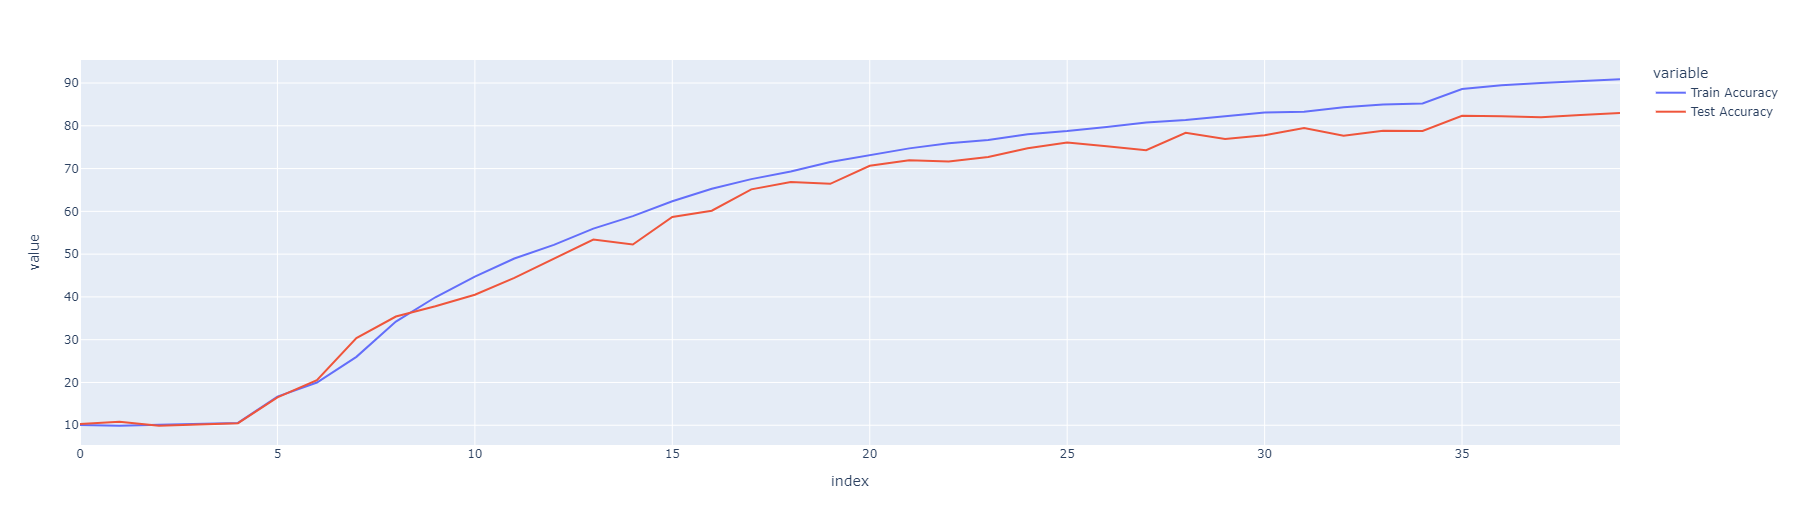

In [6]:
from IPython import display
display.Image("/content/EVA6S8_Accuracy.png")

In [ ]:
%load_ext autoreload
%autoreload 2
from miniRekog.train import traintest2
import torch
import torchvision.transforms as transforms
import torchvision
from miniRekog.config.config import config
from miniRekog.dataloaders import dataloader
import torch
from miniRekog.utils.fileutils import plot_misclassified_rgb
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F


device = torch.device("cuda" if not config['no_cuda'] else "cpu")
my_model,acc = traintest2.model_builder2(ResNetLN18(), weights_path="/content/model_saves/model-32ec0ba3a6.pt")


transform_test = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.49421428, 0.48513139, 0.45040909), (0.24665252, 0.24289226, 0.26159238))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform_test)
testloader = dataloader.get_dataloader(testset, config['batch_size'], shuffle=False, num_workers=2)
#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified


In [ ]:

class_accuracy_dict = traintest2.classwise_accuracy(my_model, testloader, dataloader.cifar10_classes, device=torch.device("cuda"))

Files already downloaded and verified
Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 74 %
Accuracy of   cat : 63 %
Accuracy of  deer : 77 %
Accuracy of   dog : 77 %
Accuracy of  frog : 94 %
Accuracy of horse : 89 %
Accuracy of  ship : 83 %
Accuracy of truck : 85 %


<BarContainer object of 10 artists>

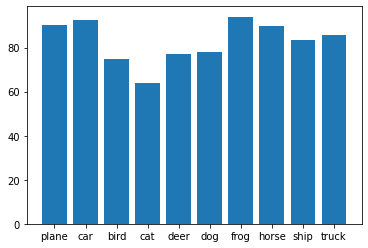

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

### Misclassifed Images

1701
(1701,)
82.99 -7.65517294921875


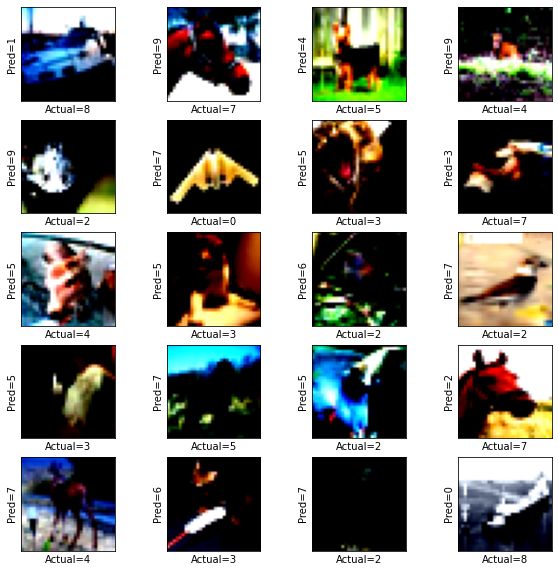

In [ ]:
my_model = my_model.to(device)
epoch_test_acc,epoch_test_loss,preds = plot_misclassified_rgb(config, 
                                                          my_model, 
                                                          device, 
                                                          testloader, 
                                                          dataloader.cifar10_classes,
                                                          1)
print(epoch_test_acc,epoch_test_loss)

### Gradcam on Misclassified images

Here preds contains the misclassified images obtained in above cell.

We have plotted the GradCam w.r.t layer2 where saliency maps are 16x16

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])
saliency_map size : torch.Size([16, 16])


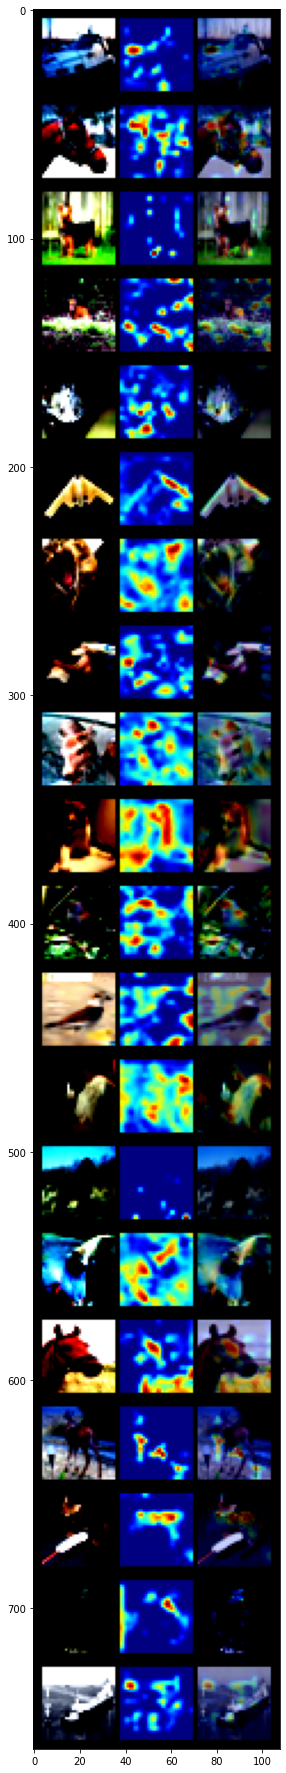

In [ ]:
import torchvision.models as models
from torchvision.utils import make_grid, save_image
from miniRekog.utils.gradcam2 import *
new_image_list = []


for img_in in preds:
    new_image_list.append(generate_gradcam_images(img_in, my_model, "layer2"))

fig = plt.figure(figsize=(16,32))
grid_op = torchvision.utils.make_grid(new_image_list, nrow=1)
plt.imshow(np.transpose(grid_op, (1, 2, 0)))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3487: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


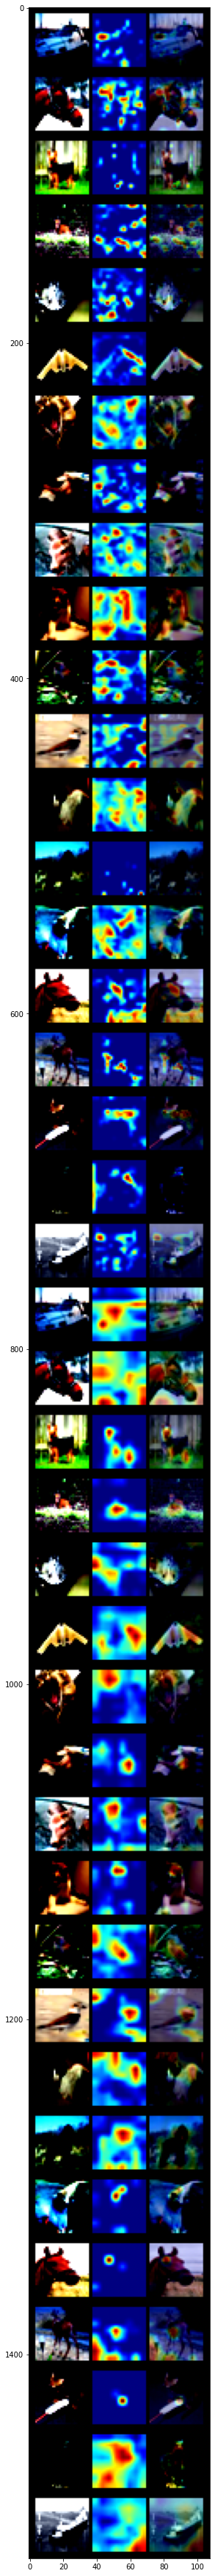

In [ ]:
for img_in in preds:
    new_image_list.append(generate_gradcam_images(img_in, my_model, "layer3"))

fig = plt.figure(figsize=(16,64))
grid_op = torchvision.utils.make_grid(new_image_list, nrow=1)
plt.imshow(np.transpose(grid_op, (1, 2, 0)))